### <center> Sea Level Predictor </center>

<div class="challenge-instructions  " data-playwright-test-label="challenge-description"><div><section id="description">
<p>You will be <a href="https://replit.com/github/freeCodeCamp/boilerplate-sea-level-predictor" target="_blank" rel="noopener noreferrer nofollow">working on this project with our Replit starter code</a>.</p>
<ul>
<li>Start by importing the project on Replit.</li>
<li>Next, you will see a <code>.replit</code> window.</li>
<li>Select <code>Use run command</code> and click the <code>Done</code> button.</li>
</ul>
<p>We are still developing the interactive instructional part of the Python curriculum. For now, here are some videos on the freeCodeCamp.org YouTube channel that will teach you everything you need to know to complete this project:</p>
<ul>
<li>
<p><a href="https://www.freecodecamp.org/news/python-for-everybody/" target="_blank" rel="noopener noreferrer nofollow">Python for Everybody Video Course</a> (14 hours)</p>
</li>
<li>
<p><a href="https://www.freecodecamp.org/news/how-to-analyze-data-with-python-pandas/" target="_blank" rel="noopener noreferrer nofollow">How to Analyze Data with Python Pandas</a> (10 hours)</p>
</li>
</ul>
</section></div><hr><div><section id="instructions">
<p>You will analyze a dataset of the global average sea level change since 1880. You will use the data to predict the sea level change through year 2050.</p>
<p>Use the data to complete the following tasks:</p>
<ul>
<li>Use Pandas to import the data from <code>epa-sea-level.csv</code>.</li>
<li>Use matplotlib to create a scatter plot using the <code>Year</code> column as the x-axis and the <code>CSIRO Adjusted Sea Level</code> column as the y-axis.</li>
<li>Use the <code>linregress</code> function from <code>scipy.stats</code> to get the slope and y-intercept of the line of best fit. Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050.</li>
<li>Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset. Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.</li>
<li>The x label should be <code>Year</code>, the y label should be <code>Sea Level (inches)</code>, and the title should be <code>Rise in Sea Level</code>.</li>
</ul>
<p>Unit tests are written for you under <code>test_module.py</code>.</p>
<p>The boilerplate also includes commands to save and return the image.</p>
<h2>Development</h2>
<p>For development, you can use <code>main.py</code> to test your functions. Click the "run" button and <code>main.py</code> will run.</p>
<h2>Testing</h2>
<p>We imported the tests from <code>test_module.py</code> to <code>main.py</code> for your convenience. The tests will run automatically whenever you hit the "run" button.</p>
<h2>Submitting</h2>
<p>Copy your project's URL and submit it to freeCodeCamp.</p>
<h2>Data Source</h2>
<p><a href="https://datahub.io/core/sea-level-rise" target="_blank" rel="noopener noreferrer nofollow">Global Average Absolute Sea Level Change</a>, 1880-2014 from the US Environmental Protection Agency using data from CSIRO, 2015; NOAA, 2015.</p>
</section></div><hr></div>

### Imports
---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

### Read CSV
---

In [65]:
df = pd.read_csv('epa-sea-level.csv')

In [66]:
df

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


### Draw plot
---

Int64Index([1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889,
            ...
            2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050],
           dtype='int64', length=171)
2000


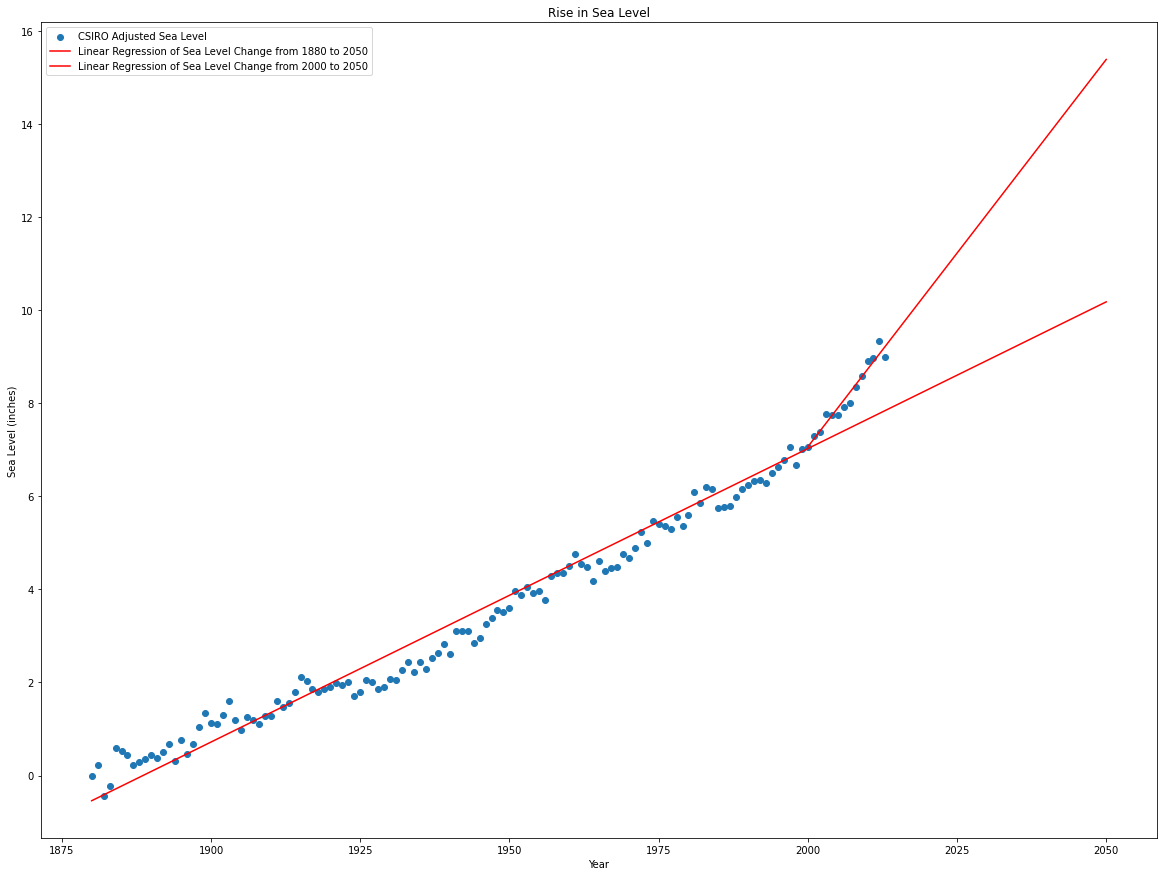

In [121]:
fig = plt.figure(figsize=[20,15])

plt.scatter(data=df, x='Year', y='CSIRO Adjusted Sea Level' )
 
# get x and y for the linear regression and plot
x = df['Year']
y= df['CSIRO Adjusted Sea Level'].values

xTo2050 =  pd.date_range(start=str(x[0]), end='2051',freq='A').year
print( xTo2050 ) 
res = linregress(x, y)
plt.plot(xTo2050, res.intercept + res.slope*xTo2050, 'r', label='Linear Regression of Sea Level Change from 1880 to 2050')

# get x and y for linear regression starting at year 2000 and going to 2050
x = df[df['Year']>=2000]['Year'].values
y= df[df['Year']>=2000]['CSIRO Adjusted Sea Level'].values
xTo2050 =  pd.date_range(start=str(x[0]), end='2051',freq='A').year
print( x[0] ) 

res = linregress(x, y)
plt.plot(xTo2050, res.intercept + res.slope*xTo2050, 'r', label='Linear Regression of Sea Level Change from 2000 to 2050')
# print(res)

plt.legend()
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.title('Rise in Sea Level')
fig.savefig('plot.png')